In [18]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
#plt.ioff()
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=13)
results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_frac.pkl", "rb"))
#results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_count_NOT_known_particles1.pkl", "rb"))
#fname = "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_count_known_particles1.pkl"
fname = "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl"
results = pickle.load(open(fname, "rb"))
#results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl", "rb"))
result = results


In [33]:
#results =results[0.4]
#result = results[0.4]
#result=results
result.keys()

dict_keys(['loss_e_fracs', 'loss_e_fracs_true', 'part_E_true', 'part_PID_true', 'reco_counts', 'non_reco_counts', 'total_counts'])

In [20]:
print(result["total_counts"])
print(sum(result["total_counts"].values()))

{2112: 29072.0, -211: 14173.0, 2212: 13181.0, -2212: 15414.0, 130: 33524.0, 211: 13617.0}
118981.0


In [34]:
particle_colors = {2112: "red", -211: "green", 2212: "blue", -2212: "purple", 130: "gray", 211: "orange"}


In [35]:
def divide_dicts(num, denom):
    d = {}
    for k in num.keys():
        if denom[k] == 0 or k not in denom:
            d[k] = "inf"
        else:
            d[k] = num[k] / denom[k]
    return d
res = divide_dicts(result["reco_counts"], result["total_counts"])
print("Efficiency per particle type:", res)

Efficiency per particle type: {2112: 1.0, -211: 1.0, 2212: 1.0, -2212: 1.0, 130: 1.0, 211: 1.0}


findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the followin

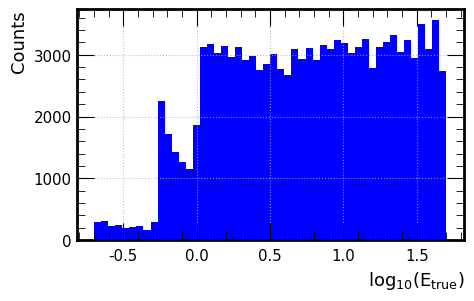

In [55]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(np.log10(result["part_E_true"]), bins=50, label="Energy true", color="blue")
#for pid in result["part_PID_true"].unique():
#    idx = [i for i, x in enumerate(result["part_PID_true"]) if x == pid]
#    ax.hist(np.log10(result["part_E_true"][idx]), bins=50, label=f"PID: {pid}", alpha=0.5, color=particle_colors[pid.item()])
ax.set_xlabel("$log_{10} (E_{true})$")
ax.set_ylabel("Counts")
ax.grid()
fig.show()
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/energy_true_distribution_more_state.pdf")

In [41]:
result["part_E_true"].max().item(), result["part_E_true"].min().item()

(50.425819396972656, 0.19992420077323914)

In [42]:
ranges = [(0.2, 1), (1, 10), (10, 50)]

In [43]:
e_frac_per_pid_and_range = {}
for pid in result["part_PID_true"].unique():
    e_frac_per_pid_and_range[pid] = {}
    for r in ranges:
        e_frac_per_pid_and_range[pid][r] = []
        idx = [i for i, x in enumerate(result["part_PID_true"]) if x == pid and result["part_E_true"][i] > r[0] and result["part_E_true"][i] <= r[1]]
        e_frac_per_pid_and_range[pid][r] = result["loss_e_fracs"][idx]
num_pids, num_ranges = len(e_frac_per_pid_and_range.keys()), len(ranges)

findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the followin

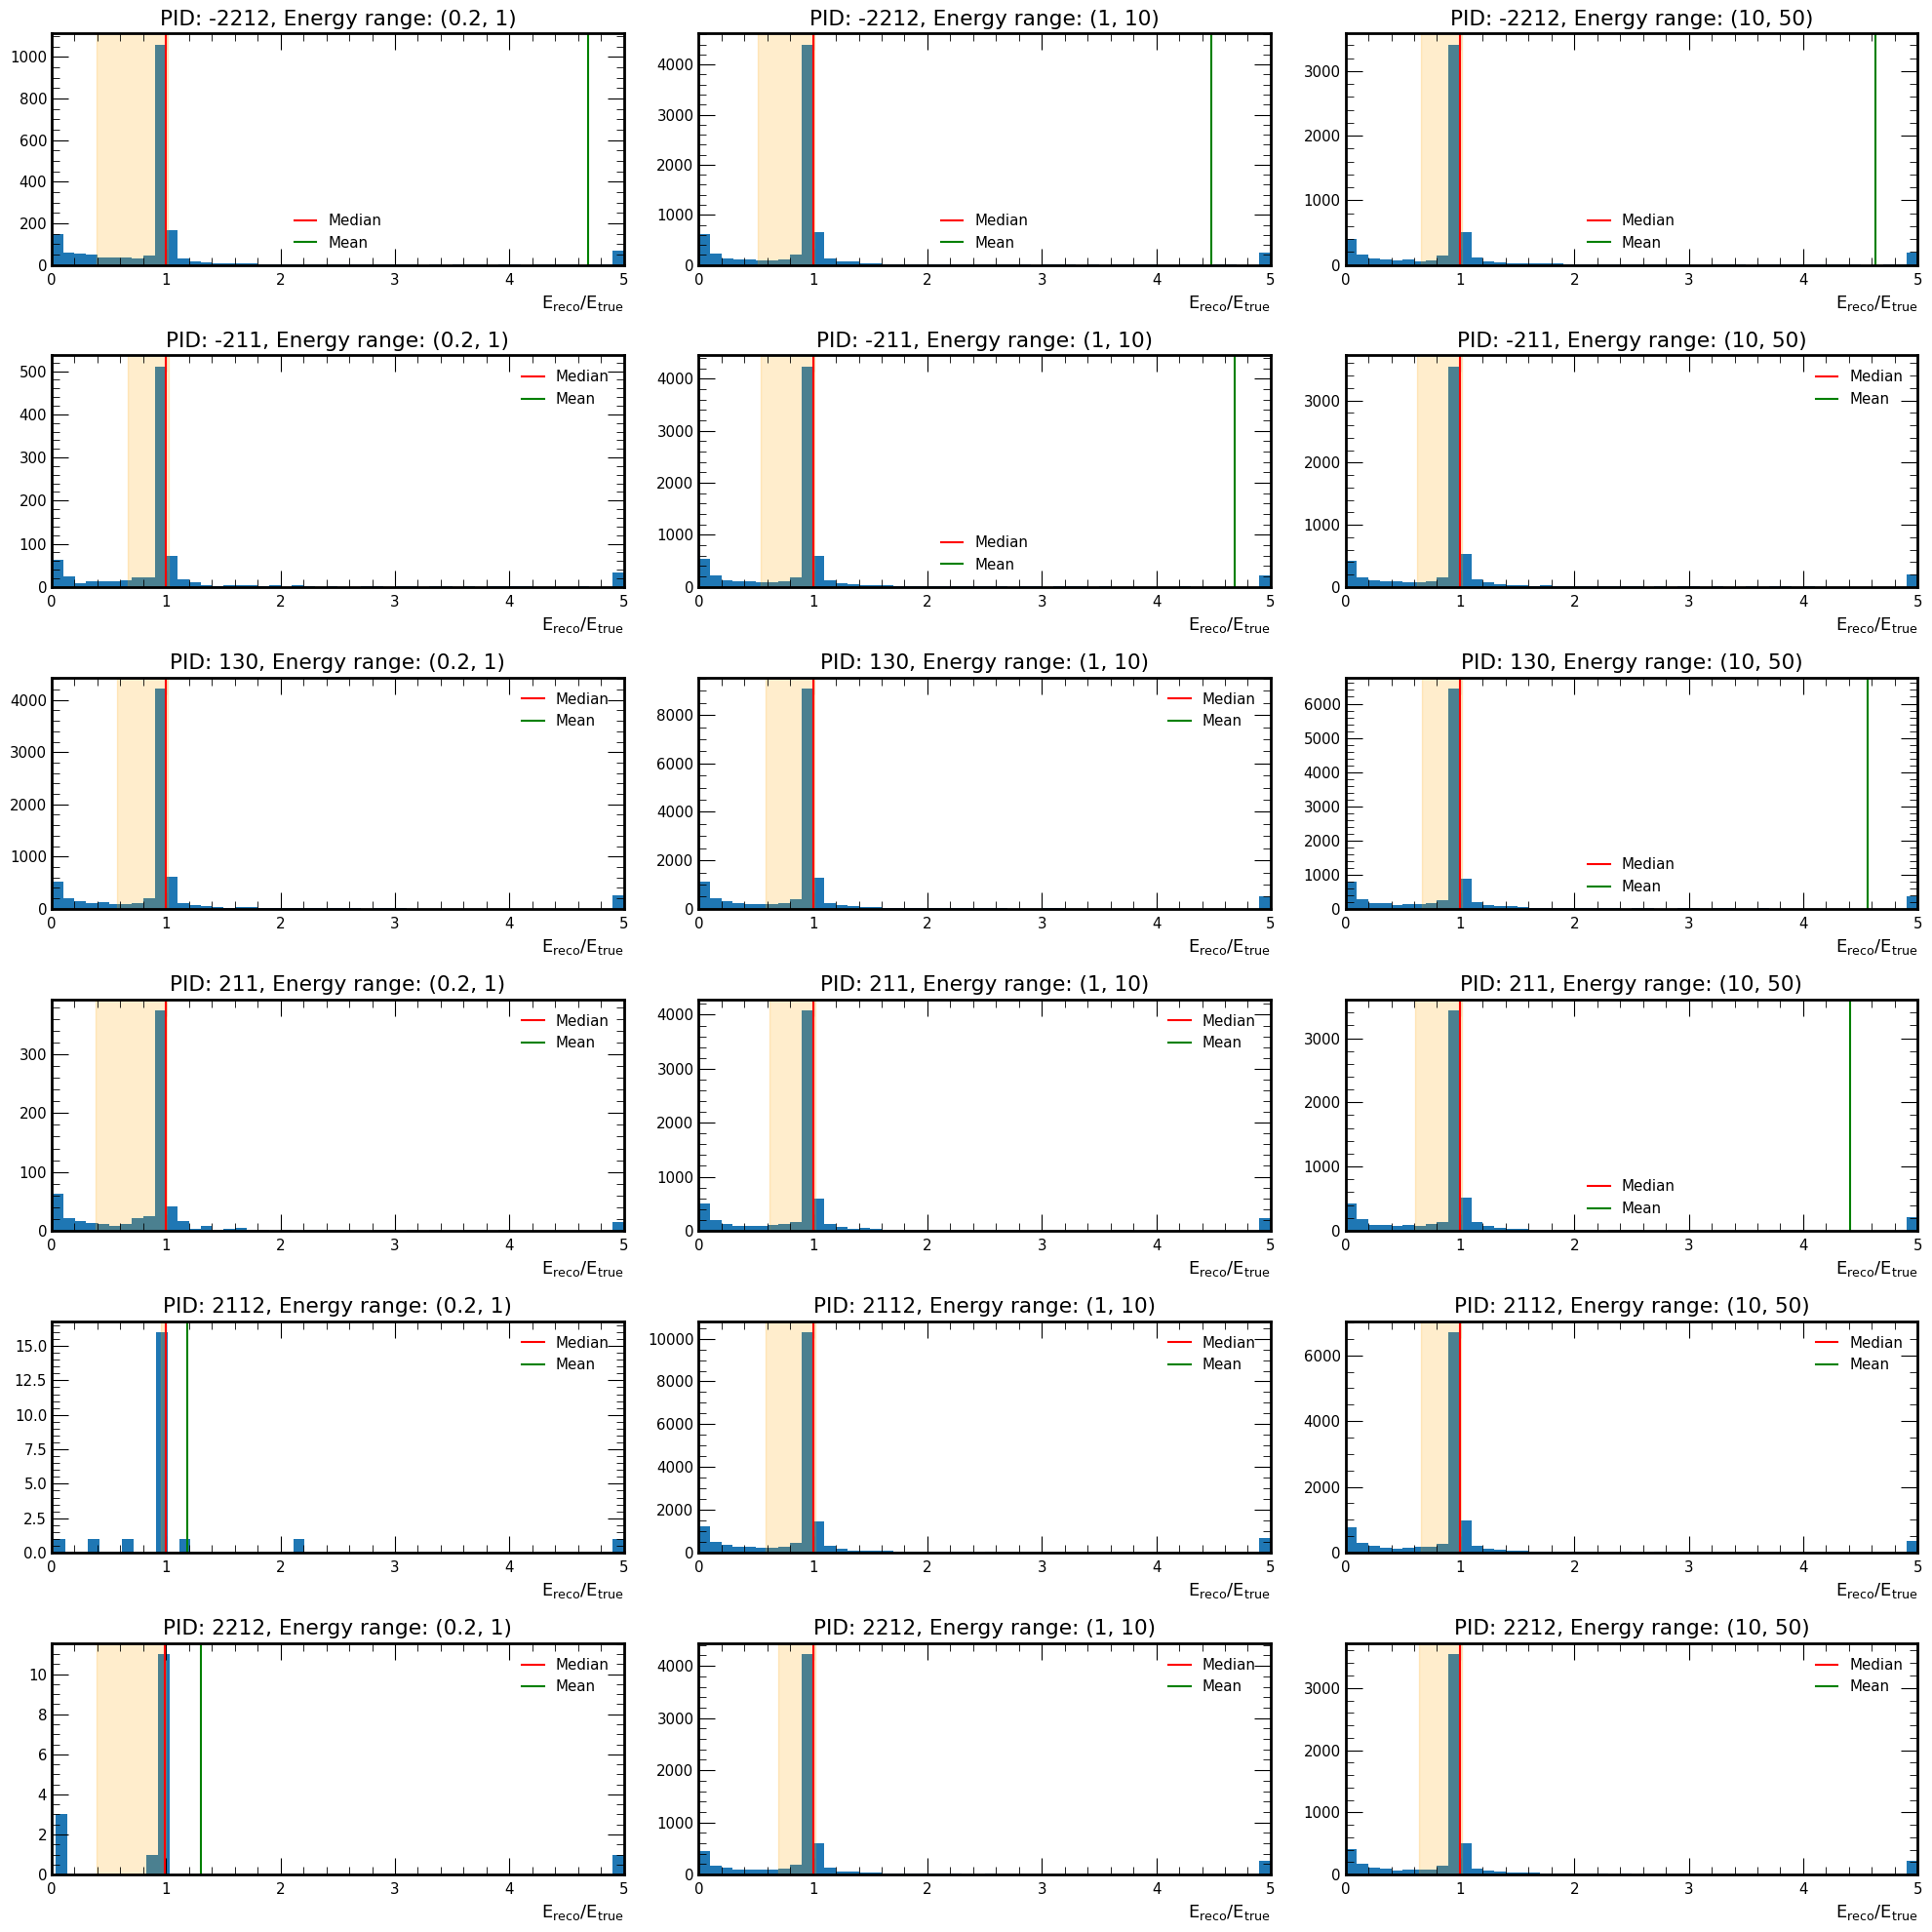

In [54]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))
intervals = {}
def clip(data, n):
    return [x if x < n else n for x in data]

for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    for j, r in enumerate(ranges):
        data = e_frac_per_pid_and_range[pid][r]
        if len(data):
            median, mean = data.median(), data.mean()
            interval_68 = (np.percentile(data, 16), np.percentile(data, 84))
            data = clip(data, 5)
            ax[i, j].hist(data, bins=50, label="")
            ax[i, j].set_xlim([0, 5])
            ax[i, j].axvline(median, color="red", label="Median")
            ax[i, j].axvline(mean, color="green", label="Mean")
            #ax[i, j].axvline(interval_68[0], color="orange", label="68% interval")
            #ax[i, j].axvline(interval_68[1], color="orange")
            # shaded 68% interval
            ax[i, j].axvspan(interval_68[0], interval_68[1], 0, 5, color="orange", alpha=0.2)
            intervals[(pid, r)] = interval_68
            ax[i, j].legend()
        ax[i, j].set_xlabel("$E_{reco} / E_{true}$")
        ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/part_plots_more_stat.pdf")
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/plot_with_known_particle_match_NOT_known_part.pdf")

[1, 10, 50] [0.3200123691558837, 0.2539534759521484, 0.17086039900779726]
[1, 10, 50] [0.16680750012397771, 0.23457889556884753, 0.19149726033210746]
[1, 10, 50] [0.2239965081214904, 0.21107863187789921, 0.17514747738838188]
[1, 10, 50] [0.30754048407077783, 0.19474809169769292, 0.2039778947830201]
[1, 10, 50] [0.023969371318817156, 0.2141159403324127, 0.1770061075687408]
[1, 10, 50] [0.30229203030467033, 0.1685507893562317, 0.19259753704071048]


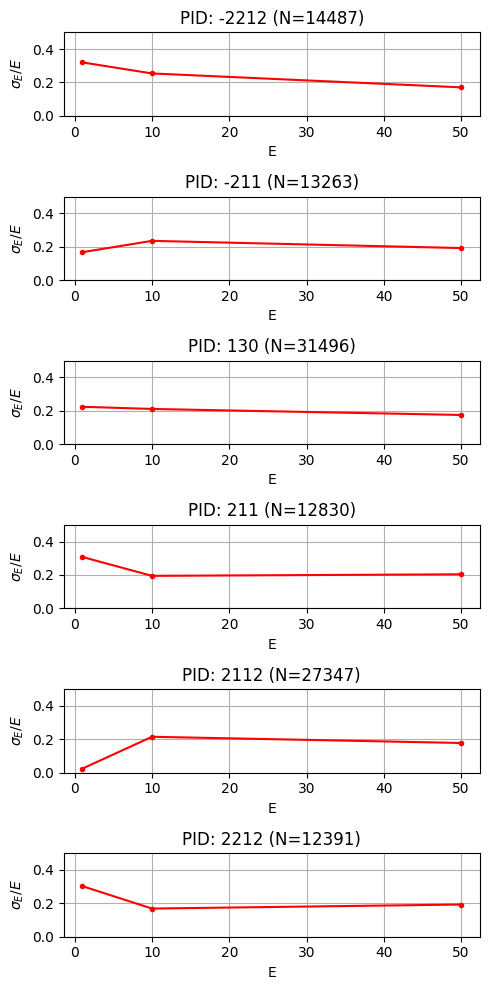

In [179]:
fig, ax = plt.subplots(num_pids, 1, figsize=(5, 10))
for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    sigmas, energies = [], []
    #sigmas = [intervals[(pid, r)] for r in ranges]
    #energies = [r[1] for r in ranges]
    for j in range(len(ranges)):
        #print(ranges[j])
        if (pid, ranges[j]) in intervals:
            sigmas.append((intervals[(pid, ranges[j])][1] - intervals[(pid, ranges[j])][0]) / 2)
            energies.append(ranges[j][1])
    print(energies, sigmas)
    ax[i].plot(energies, sigmas, ".-", color="red")
    ax[i].set_xlabel("E")
    ax[i].set_ylabel("$\sigma_E/E$")
    ax[i].set_title(f"PID: {pid} (N={sum(result['part_PID_true'] == pid)})")
    #ax[i].set_xscale("log")
    ax[i].grid()
    ax[i].set_ylim([0, 0.5])
fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/sigma_vs_energy_with_known_particle_match_range.pdf")


findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the followin

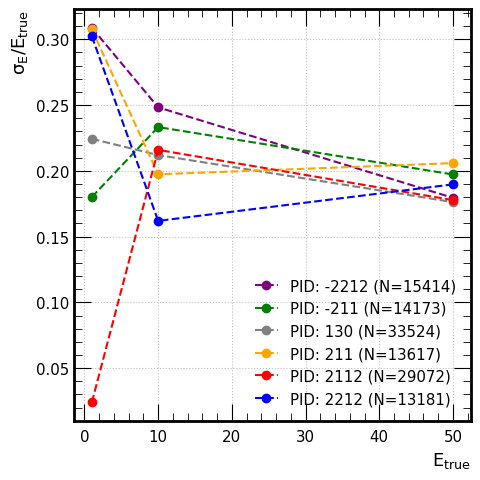

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))

for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    sigmas, energies = [], []
    for j in range(len(ranges)):
        if (pid, ranges[j]) in intervals:
            sigmas.append((intervals[(pid, ranges[j])][1] - intervals[(pid, ranges[j])][0]) / 2)
            energies.append(ranges[j][1])
    #print(energies, sigmas)
    ax.plot(energies, sigmas, "o--", color=particle_colors[pid.item()], label="PID: " + str(pid.item()) + " (N=" + str(sum(result['part_PID_true'] == pid).item()) + ")")
ax.set_xlabel("$E_{true}$")
ax.set_ylabel("$\sigma_E/E_{true}$")
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/sigma_vs_energy_eff1_morestat.pdf")
